# Ejercicio 1
Generar 30 samples de una distribución Bernoulli de parámetro 𝑝 = 0.3. 
* (a) Encontrar el estimador plug-in del desvío estándar 𝜎 de la distribución. 
* (b) Estimar su error estándar usando bootstrap. 
* (c) Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, percentile bootstrap, basic bootstrap y BCa. 2. Considerar los datasets de los precio

Nota: Si tienes un parámetro poblacional que depende de ciertos parámetros teóricos desconocidos, el estimador plug-in consiste en sustituir esos parámetros desconocidos por sus correspondientes estimadores muestrales.

In [12]:
#La varianza de la Bernoulli es p(1-p)
#Con esto resolvemos el punto a
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

p = 0.3
varianza = p*(1-p)
print("La varianza de la Bernoulli es: ", varianza)


La varianza de la Bernoulli es:  0.21


Intervalo de confianza para la media (bootstrap): ConfidenceInterval(low=np.float64(0.23333333333333334), high=np.float64(0.5666666666666667))


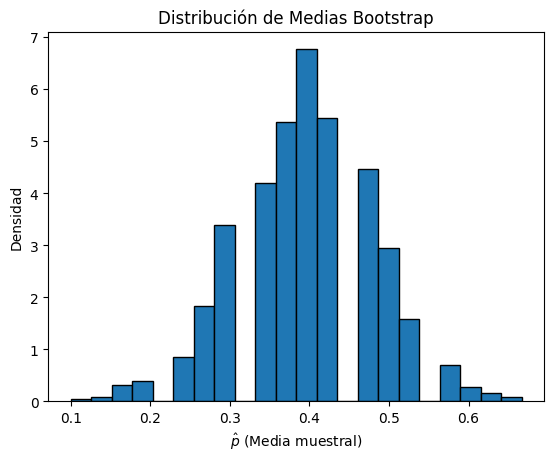

'\n\nbootstrap_samples = np.random.choice(bernoulli, size=(N, n), replace=True)\nmean = np.mean(bootstrap_samples, axis=1)\nerror_estandar = np.std(mean)\n\n\n\nprint("El error estandar es: ", error_estandar)\n\nplt.hist(mean, bins=30, edgecolor=\'black\', alpha=0.7)\nplt.title("Distribución de medias bootstrap")\nplt.xlabel("Media muestral")\nplt.ylabel("Frecuencia")\nplt.show()\n'

In [13]:
#1.b
#Estimamos el error estandar usando bootstrap
np.random.seed(0)
N = 1000
n = 30
p = 0.3
alpha= 0.05
np.random.seed(0)
sample = np.random.binomial(1, p, size=n)
sample = (sample,)

boot_res = stats.bootstrap(sample, np.mean, confidence_level=1-alpha, n_resamples=1000)
print(f"Intervalo de confianza para la media (bootstrap): {boot_res.confidence_interval}")

# Graficamos la distribución de medias bootstrap
fig, ax = plt.subplots()
ax.hist(boot_res.bootstrap_distribution, bins='auto', density=True, edgecolor='black')
ax.set_title('Distribución de Medias Bootstrap')
ax.set_xlabel(r'$\hat{p}$ (Media muestral)')
ax.set_ylabel('Densidad')
plt.show()
"""

bootstrap_samples = np.random.choice(bernoulli, size=(N, n), replace=True)
mean = np.mean(bootstrap_samples, axis=1)
error_estandar = np.std(mean)



print("El error estandar es: ", error_estandar)

plt.hist(mean, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribución de medias bootstrap")
plt.xlabel("Media muestral")
plt.ylabel("Frecuencia")
plt.show()
"""

IC_normal =  [np.float64(0.44518279490633467), np.float64(0.5346131022069367)]
IC_percentile =  [np.float64(0.4229525846816506), np.float64(0.5)]
IC_basic =  [np.float64(0.4797958971132713), np.float64(0.5568433124316208)]
IC_bca =  [np.float64(0.4229525846816506), np.float64(0.5)]


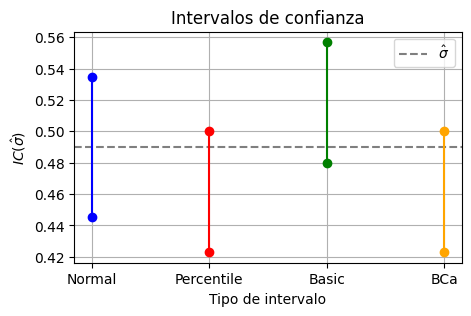

In [15]:
#punto 1.c
#Este lo copie del repo de bootstrap de los profes. 
std = np.std(sample)

boot_percentile = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'percentile')
boot_basic = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'basic')
boot_bca = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'bca')

low_percentile = boot_percentile.confidence_interval.low
up_percentile = boot_percentile.confidence_interval.high

low_basic = boot_basic.confidence_interval.low
up_basic = boot_basic.confidence_interval.high

low_bca = boot_bca.confidence_interval.low
up_bca = boot_bca.confidence_interval.high

low_normal = std - stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error #puede ser el error estándar de cualquiera
up_normal = std + stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error



print('IC_normal = ',[low_normal,up_normal])
print('IC_percentile = ',[low_percentile,up_percentile])
print('IC_basic = ',[low_basic,up_basic])
print('IC_bca = ',[low_bca,up_bca])


plt.figure(figsize=(5, 3))
interval_names = ['Normal', 'Percentile', 'Basic', 'BCa']
plt.axhline(std,color='k',ls='--',label=r'$\hat{\sigma}$',alpha=0.5)
plt.plot([1, 1], [low_normal, up_normal],'o-', color='blue')
plt.plot([2, 2], [low_percentile, up_percentile],'o-', color='red')
plt.plot([3, 3], [low_basic, up_basic],'o-', color='green')
plt.plot([4, 4], [low_bca, up_bca],'o-', color='orange')
plt.xticks([1,2,3,4],labels=interval_names)
plt.xlabel('Tipo de intervalo')
plt.ylabel(r'$IC(\hat{\sigma})$')
plt.title('Intervalos de confianza')
plt.legend()
plt.grid()
plt.show()
